In [5]:
import pandas as pd
import pygwalker as pyg
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('medical_staff_city.csv',encoding='utf-8')

In [7]:

columns_to_save = ['시군구별(1)','2020.1/4','2021.1/4','2022.1/4','2023.1/4','2024.1/4']
df_filtered = df[df['시군구별(1)'] != '시군구별(1)']
df_filtered = df_filtered[columns_to_save]
columns_to_convert = ['2020.1/4', '2021.1/4', '2022.1/4','2023.1/4','2024.1/4']
df_filtered[columns_to_convert] = df_filtered[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')
korean_to_english = {
    '전체': 'Total',
    '서울': 'Seoul',
    '부산': 'Busan',
    '대구': 'Daegu',
    '인천': 'Incheon',
    '광주': 'Gwangju',
    '대전': 'Daejeon',
    '울산': 'Ulsan',
    '세종': 'Sejong',
    '경기': 'Gyeonggi',
    '강원': 'Gangwon',
    '충북': 'Chungbuk',
    '충남': 'Chungnam',
    '전북': 'Jeonbuk',
    '전남': 'Jeonnam',
    '경북': 'Gyeongbuk',
    '경남': 'Gyeongnam',
    '제주': 'Jeju'
}
df_filtered['시군구별(1)'] = df_filtered['시군구별(1)'].replace(korean_to_english)

# 将 DataFrame 转换为长格式
df_long = df_filtered.melt(id_vars=['시군구별(1)'], var_name='Year', value_name='Population')
walker = pyg.walk(df_filtered)

Box(children=(HTML(value='\n<div id="ifr-pyg-00061e25e6690ab6OTuol9hGJ4vzb67S" style="height: auto">\n    <hea…

In [11]:
df_filtered.shape

(18, 5)

In [9]:
df_filtered.to_csv('output.csv', index=False, encoding='utf-8')


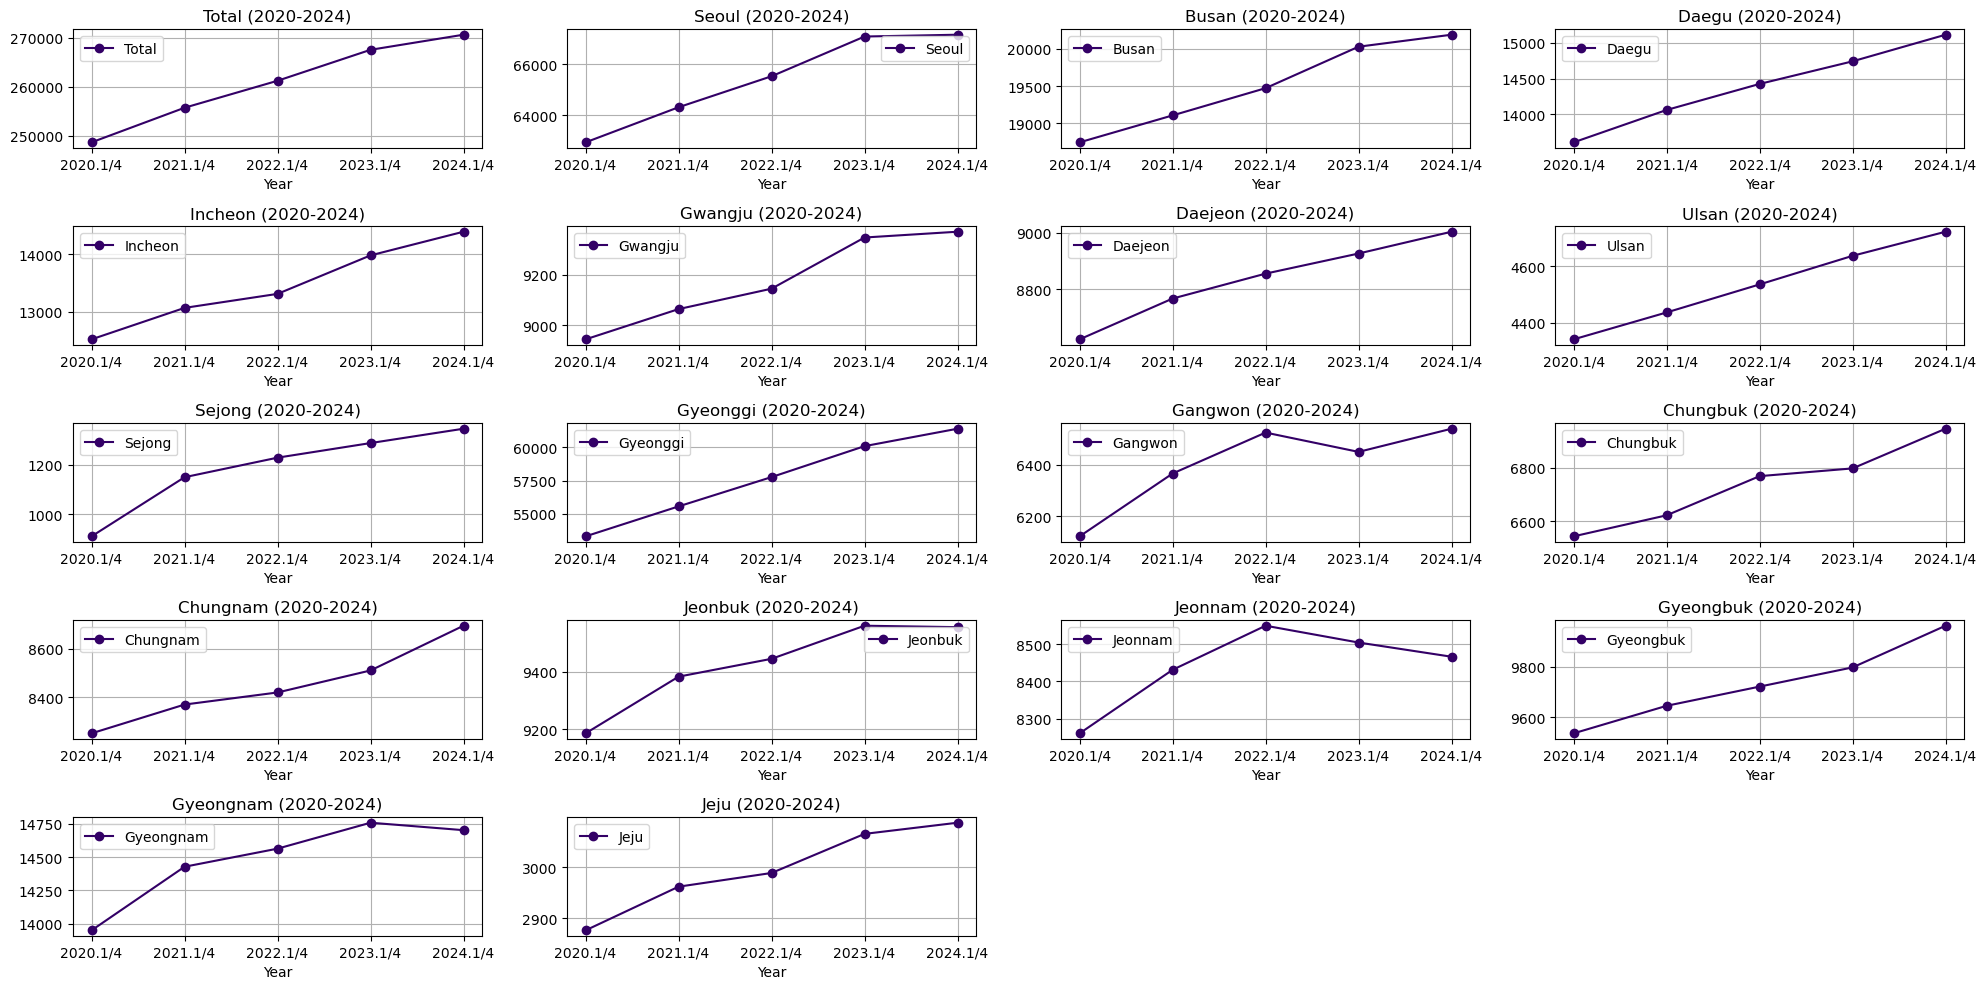

In [8]:
years = columns_to_convert
df_filtered.set_index('시군구별(1)', inplace=True)

num_cities = len(df_filtered.index)
num_cols = 4  # 每行显示的图数量
num_rows = (num_cities + num_cols - 1) // num_cols  # 计算总行数

# 创建子图
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()

# 为每个城市创建折线图
for i, city in enumerate(df_filtered.index):
    ax = axes[i]
    ax.plot(years, df_filtered.loc[city, columns_to_convert], marker='o', label=city, color='#330066')
    ax.set_title(f'{city} (2020-2024)')
    ax.set_xlabel('Year')
    #ax.set_ylabel('Medical Stuff Quantity')
    ax.grid(True)
    ax.legend()

# 隐藏未使用的子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 调整布局
plt.tight_layout()
plt.show()